# Análise Descritiva 
### Departamento de Policia e Segurança - Guaratingueta
                                                                           Bruno Bastos
                                                                           Matheus Olimpio
                                                                           
                                                                       
#### Introdução
A segurança é um dos pilares que constituem uma socidade, o seu desenvolvimento se faz necessário. Seu crescimento é perpendicular de acordo com as regiões. A melhor forma de avaliar se avaliar a segurança de uma cidade é através de ferramentas exatas, como a estátistica aplicada a computação para o processamento rápido de todos os dados coletados.
Este projeto faz parte da matéria de Laboratório de Redes da FATEC de Cruzeiro, e tem como objetivo realizar uma análise descritiva na cidade de guaratingueta através do pilar de segurança e ocorrencias.


##### Variáveis
As variáveis identificadas são:
 - Natureza de Ocorrencias (Qualitativa/nominal)
 - Departamentos (Qualitativa/nominal)
 - Ano (Qualitativa/ordinal)
 - Mês (Qualitativa/ordinal)
 - Quantidade de Ocorrencias (Quantitativa/Discreta)

##### Análise
- Análise de ocorrências
    - _Análise de Homicídios_
    - _Análise de Lesões_
    - _Análise de Estupro_
    - _Análise de Roubos_
    - _Análise de Furtos_

- Análise de Departamento
    - _Análise do DP-01_
    - _Análise do DP-02_
    - _Análise do DP-03_
      
---

## Análises##
Afim de realizar um estudo quantitativo das ocorrencias de Guaratingueta,os dados foram coletados do site da policia de SP, com o principal foco em resumir, sumarizar e explorar o comportamento dos dados(ocorrencias). É preciso ressaltar que algumas análises foram realizas apenas com o ano de 2017 e 2018, deixando de lado o ano de 2019 devido a não vigencia de todos os meses.

---
### Análise de Homicídios 
---

,Natureza,Sigla
0,Homicídio Doloso,HD
1,Homicídio Doloso Acidente de Transito,HDAT
2,Homicídio Culposo Acidente de Transito,HCAT
3,Homicídio Culposo Outros,HCO
4,Tentativa de Homicídio,TH


 ---------------------------------------------------------------
 Análise Geral de Homicidios 
 ---------------------------------------------------------------


,HD,HDAT,HCAT,HCO,TH
2017,9,0,15,0,33
2018,42,0,12,3,27
2019,9,0,6,3,15


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,9,15.79
1,HDAT,0,0.0
2,HCAT,15,26.32
3,HCO,0,0.0
4,TH,33,57.89


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,42,50.0
1,HDAT,0,0.0
2,HCAT,12,14.29
3,HCO,3,3.57
4,TH,27,32.14


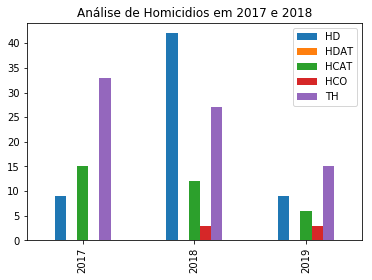

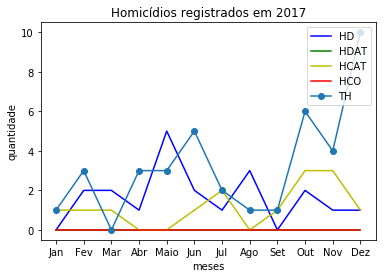

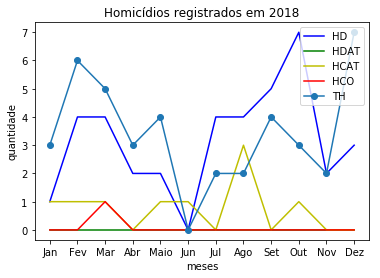

In [18]:
Facade.homicidios()

__conclusões__

 - Crescimento de homícidios de 2017 para 2018(40%). É importante ressaltar que o crescimento foi devido aos homicidios dolosos, em vista de que as naturezas tentativa de homicidio, e homicidios por transito, foram reduzidas.
---
 - Em 2018 houve um notável crescimento de homicídios dolosos.(466%)
---
 - A quantidade de homicidio doloso do ano de 2017, é a mesma que os quatro primeros meses de 2019.
--- 
 - Em 2017 e 2018 a média é de 6 homicidios mensais.

### Análise de Lesões Corporais
---

,Natureza,Sigla
0,Lesão Corporal Seguida de Morte,LCSM
1,Lesão Corporal Dolosa,LCD
2,Lesão Corporal Culposo Acidente de Transito,LCCAT
3,Lesão Corporal Culposo Outros,LCCO


 ---------------------------------------------------------------
 Análise Geral de Lesões 
 ---------------------------------------------------------------


,LCSM,LCD,LCCAT,LCCO
2017,0,219,329,8
2018,0,226,336,10
2019,0,68,43,17


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,219,39.39
2,LCCAT,329,59.17
3,LCCO,8,1.44


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,226,39.51
2,LCCAT,336,58.74
3,LCCO,10,1.75


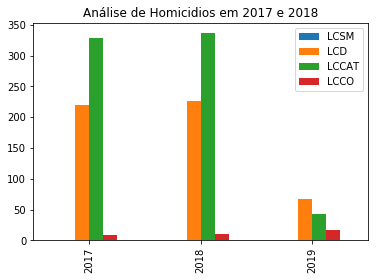

In [84]:
Facade.lesoes()

### Análise de Estupros
---

,Natureza,Sigla
0,Estupro,ES
1,Estupro de Vunerável,ESV


 ---------------------------------------------------------------
 Análise Geral de Estupros 
 ---------------------------------------------------------------


,ES,ESV
2017,16,22
2018,6,13


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,ES,16,42.11
1,ESV,22,57.89


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,ES,6,31.58
1,ESV,13,68.42


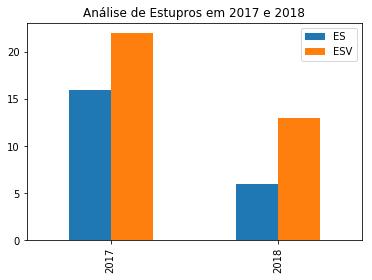

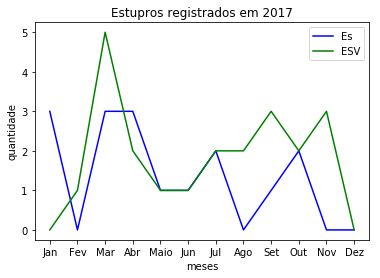

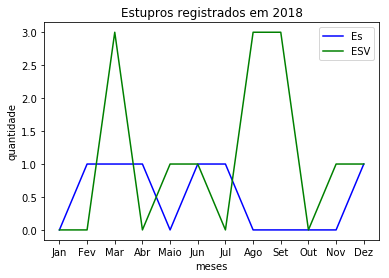

In [78]:
Facade.estupros()

__conclusões__

- O Estupro vunerável é o de maior ocorrência em 2017 e 2018.
---
- Em ambas naturezas houve uma queda. 
    * 49% em estupros vuneráveis
    * 62% em estupros
--- 
- Em ambos anos:
    * Março é o mes que registra o maior número de estupros vuneráveis.
    * 1 Estupro vunerável é realizado por mês.
    * 2 Estupros são realizados por mês.

### Análise de Roubos
---

,Natureza,Sigla
0,Roubo - Outros,RO
1,Roubo de Veiculos,RV
2,Roubo a Banco,RB
3,Roubo de Carga,RC


 ---------------------------------------------------------------
 Análise Geral de Roubos 
 ---------------------------------------------------------------


,RO,RV,RB,RC
2017,473,40,0,2
2018,324,58,0,6


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,RO,473,91.84
1,RV,40,7.77
2,RB,0,0.0
3,RC,2,0.39


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,RO,324,83.51
1,RV,58,14.95
2,RB,0,0.0
3,RC,6,1.55


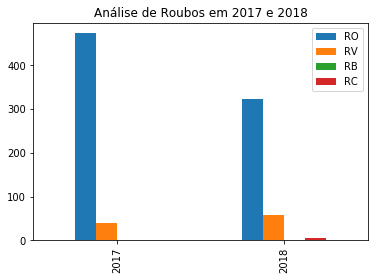

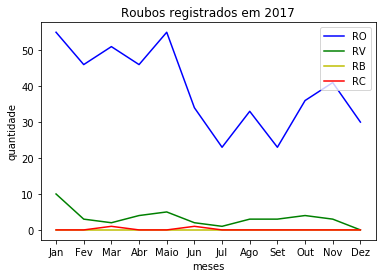

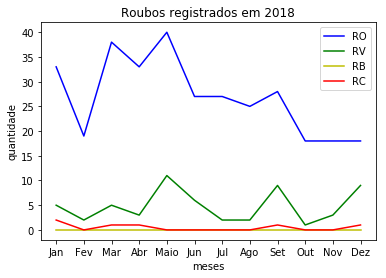

In [91]:
Facade.roubos()

__conclusões__

- Roubo-outros é a natureza de maior frequencia em todos os anos e meses.
---
- De 2017 para 2018, Roubo - Outros foi o único que teve uma queda.
---
- Em 2018, Roubo de veiculos aumentou 45%, e Roubo de carga aumentou 300%.
--- 
- Em ambos os anos:
    * 4 Veiculos são roubados por mês
    * 1 Roubo outros são realizados por dia.

### Análise de Furtos
---

 ---------------------------------------------------------------
 Análise Geral de Furtos 
 ---------------------------------------------------------------


,FO,FV
2017,1359,171
2018,1251,117


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,FO,1359,88.82
1,FV,171,11.18


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,FO,1251,91.45
1,FV,117,8.55


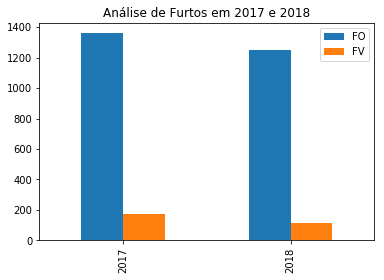

In [8]:
Facade.furtos()

# Análise de Departamentos
---

### Homicídios

---
- Análise Geral de Homicidios por Departamento



 ---------------------------------------------------------------
 Departamento 1 
 ---------------------------------------------------------------


,HD,HDAT,HCAT,HCO,TH
2017,3,0,5,0,11
2018,14,0,4,1,9
2019,3,0,2,1,5


- 2017


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,3,15.79
1,HDAT,0,0.0
2,HCAT,5,26.32
3,HCO,0,0.0
4,TH,11,57.89


- 2018


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,14,50.0
1,HDAT,0,0.0
2,HCAT,4,14.29
3,HCO,1,3.57
4,TH,9,32.14


- 2019


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,14,50.0
1,HDAT,0,0.0
2,HCAT,4,14.29
3,HCO,1,3.57
4,TH,9,32.14


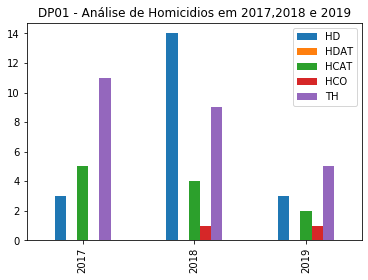

In [111]:
Facade.homicidiosDP(0)

 ---------------------------------------------------------------
 Departamento 2 
 ---------------------------------------------------------------


,HD,HDAT,HCAT,HCO,TH
2017,12,0,5,0,22
2018,19,0,4,0,15
2019,1,0,1,7,1


- 2017


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,12,30.77
1,HDAT,0,0.0
2,HCAT,5,12.82
3,HCO,0,0.0
4,TH,22,56.41


- 2018


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,19,50.0
1,HDAT,0,0.0
2,HCAT,4,10.53
3,HCO,0,0.0
4,TH,15,39.47


- 2019


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,19,50.0
1,HDAT,0,0.0
2,HCAT,4,10.53
3,HCO,0,0.0
4,TH,15,39.47


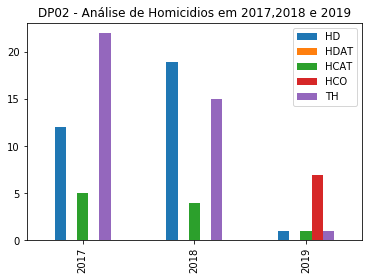

In [112]:
Facade.homicidiosDP(1)

 ---------------------------------------------------------------
 Departamento 3 
 ---------------------------------------------------------------


,HD,HDAT,HCAT,HCO,TH
2017,5,0,4,0,6
2018,5,0,1,0,17
2019,1,0,0,0,2


- 2017


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,5,33.33
1,HDAT,0,0.0
2,HCAT,4,26.67
3,HCO,0,0.0
4,TH,6,40.0


- 2018


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,5,21.74
1,HDAT,0,0.0
2,HCAT,1,4.35
3,HCO,0,0.0
4,TH,17,73.91


- 2019


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,5,21.74
1,HDAT,0,0.0
2,HCAT,1,4.35
3,HCO,0,0.0
4,TH,17,73.91


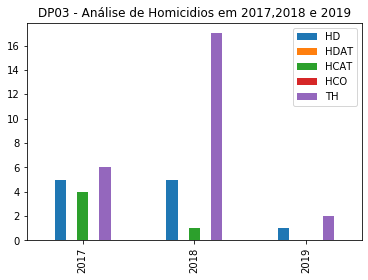

In [113]:
Facade.homicidiosDP(2)

### Análise de Lesões Corporais
---
- Análise Geral de Lesões Corporais

 ---------------------------------------------------------------
 Departamento 1 
 ---------------------------------------------------------------


,LCSM,LCD,LCCAT,LCCO
2017,0,82,71,1
2018,0,77,73,1
2019,0,28,11,4


- 2017


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,82,53.25
2,LCCAT,71,46.1
3,LCCO,1,0.65


- 2018


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,77,50.99
2,LCCAT,73,48.34
3,LCCO,1,0.66


- 2019


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,77,50.99
2,LCCAT,73,48.34
3,LCCO,1,0.66


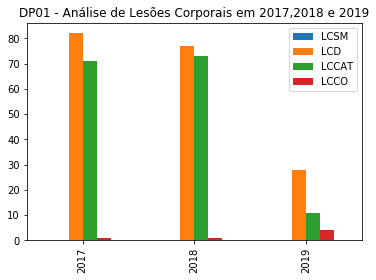

In [114]:
Facade.lesoesDP(0)

 ---------------------------------------------------------------
 Departamento 2 
 ---------------------------------------------------------------


,LCSM,LCD,LCCAT,LCCO
2017,0,55,184,4
2018,0,67,164,6
2019,0,7,5,12


- 2017


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,55,22.63
2,LCCAT,184,75.72
3,LCCO,4,1.65


- 2018


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,67,28.27
2,LCCAT,164,69.2
3,LCCO,6,2.53


- 2019


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,67,28.27
2,LCCAT,164,69.2
3,LCCO,6,2.53


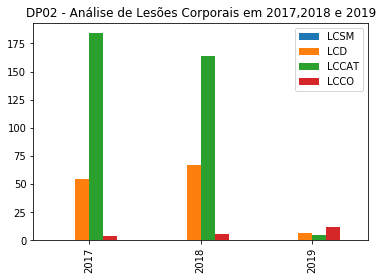

In [109]:
Facade.lesoesDP(1)

 ---------------------------------------------------------------
 Departamento 3 
 ---------------------------------------------------------------


,LCSM,LCD,LCCAT,LCCO
2017,0,82,74,3
2018,0,82,99,3
2019,0,33,27,1


- 2017


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,82,51.57
2,LCCAT,74,46.54
3,LCCO,3,1.89


- 2018


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,82,44.57
2,LCCAT,99,53.8
3,LCCO,3,1.63


- 2019


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,82,44.57
2,LCCAT,99,53.8
3,LCCO,3,1.63


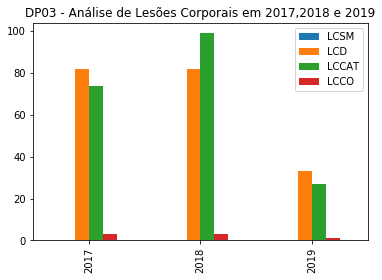

In [110]:
Facade.lesoesDP(2)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

%matplotlib inline

###########################################################
## Class Facade
## This class process the datas and build the graphs and tables || its a middleware
###########################################################
class Facade:
    

    @staticmethod
    def furtos():
        #Table.showFurtosSigla()
        a = Data.getFurtos('2017')
        b = Data.getFurtos('2018')

        
        Facade.mensagem('Análise Geral de Furtos')
        titulo = 'Análise de Furtos em 2017 e 2018'
        columns = ['FO','FV']
        index = ['2017','2018']
        Facade.graficoGeral([a,b], titulo, columns, index)
        Facade.estatistica(a, columns)
        Facade.estatistica(b, columns)
         
        
    @staticmethod
    def estupros():
        Table.showEstuprosSigla()
        
        a, a1 = Data.getEstupros('2017')
        b, b1 = Data.getEstupros('2018')
        
        columns = ['ES','ESV']
        index = ['2017','2018']
        titulo = 'Análise de Estupros em 2017 e 2018'
        
        Facade.mensagem('Análise Geral de Estupros') 
        Facade.graficoGeral([a,b], titulo, columns, index)
        Facade.estatistica(a, columns)
        Facade.estatistica(b, columns)
        Facade.graficoPorMes(a1, ['Es','ESV'],['-b','-g'] ,'Estupros registrados em 2017','meses', 'quantidade')
        Facade.graficoPorMes(b1, ['Es','ESV'],['-b','-g'] ,'Estupros registrados em 2018','meses', 'quantidade')

    @staticmethod
    def roubos():
        Table.showRoubosSigla()
        
        a, a1 = Data.getRoubos('2017')
        b, b1 = Data.getRoubos('2018')
        columns = ['RO','RV','RB','RC']
        index = ['2017','2018']
        titulo = 'Análise de Roubos em 2017 e 2018'
          
        Facade.mensagem('Análise Geral de Roubos')
        Facade.graficoGeral([a,b], titulo, columns, index)
        Facade.estatistica(a, columns)
        Facade.estatistica(b, columns)
        Facade.graficoPorMes(a1, columns,['-b','-g','-y','-r'] ,'Roubos registrados em 2017','meses', 'quantidade')
        Facade.graficoPorMes(b1, columns,['-b','-g','-y','-r'] ,'Roubos registrados em 2018','meses', 'quantidade')

    @staticmethod 
    def lesoes():
        Table.showLesoesSigla()
        
        a = Data.getLesoes('2017')
        b = Data.getLesoes('2018')
        c = Data.getLesoes('2019')
        titulo= 'Análise de Lesões Corporais em 2017 e 2018'
        columns = ['LCSM','LCD','LCCAT','LCCO']
        index = ['2017','2018','2019']
        
        Facade.mensagem('Análise Geral de Lesões')
        Facade.graficoGeral([a,b,c], titulo, columns, index)
        Facade.estatistica(a, columns)
        Facade.estatistica(b, columns)
 
    @staticmethod
    def homicidios():
        Table.showHomicidiosSigla()

        a,a1 = Data.getHomicidios('2017')
        b,b1 = Data.getHomicidios('2018')
        c,c1 = Data.getHomicidios('2019')
        titulo = 'Análise de Homicidios em 2017 e 2018'
        index = ['2017','2018','2019']
        columns = ['HD','HDAT','HCAT','HCO','TH']
        
        Facade.mensagem('Análise Geral de Homicidios')
        Facade.graficoGeral([a,b,c], titulo, columns, index)
        Facade.estatistica(a, columns)
        Facade.estatistica(b, columns)
        Facade.graficoPorMes(a1, columns,['-b','-g','-y','-r','-o'] ,'Homicídios registrados em 2017','meses', 'quantidade')
        Facade.graficoPorMes(b1, columns,['-b','-g','-y','-r','-o'] ,'Homicídios registrados em 2018','meses', 'quantidade')

        
    @staticmethod 
    def homicidiosDP(dp):
        a = Data.getHomicidiosDP('2017', dp)
        b = Data.getHomicidiosDP('2018', dp)
        c = Data.getHomicidiosDP('2019', dp)
        index = ['2017','2018', '2019']
        titulo = 'DP0'+str(dp+1)+' - Análise de Homicidios em 2017,2018 e 2019'
        columns = ['HD','HDAT','HCAT','HCO','TH']
        Facade.mensagem('Departamento ' + str(dp+1))
        Facade.graficoGeral([a,b,c], titulo, columns, index)
        print('- 2017')
        Facade.estatistica(a, columns)
        print('- 2018')
        Facade.estatistica(b, columns)
        print('- 2019')
        Facade.estatistica(b, columns)
        
    @staticmethod 
    def lesoesDP(dp):
        
        a = Data.getLesoesDP('2017',dp)
        b = Data.getLesoesDP('2018', dp)
        c = Data.getLesoesDP('2019',dp)
        titulo= 'DP0'+str(dp+1)+' - Análise de Lesões Corporais em 2017,2018 e 2019'
        columns = ['LCSM','LCD','LCCAT','LCCO']
        index = ['2017','2018','2019']
        
        Facade.mensagem('Departamento '+ str(dp+1))
        Facade.graficoGeral([a,b,c], titulo, columns, index)
        print('- 2017')
        Facade.estatistica(a, columns)
        print('- 2018')
        Facade.estatistica(b, columns)
        print('- 2019')
        Facade.estatistica(b, columns)
    
    ##################### UTILS

    @staticmethod
    def static(a):
        sa = sum(a)
        return [str(round(((a[x] * 100)/ sa), 2)) for x in range(len(a))]
        

    @staticmethod
    def graficoGeral(data, titulo,columns, index):
        fig, (ax) = plt.subplots(nrows = 1,ncols = 1)
        ax.set_title(titulo)
        df = pd.DataFrame(data, columns = columns, index = index)
        df.plot.bar(ax = ax)
        display(df)
    
    @staticmethod
    def estatistica(data, columns):
        ax = Facade.static(data)
        columns =  columns
        df = Table.create(['Natureza','Frequencia Absoluta','Frequencia Relativa(%)'],[columns, data, ax])
        display(df)

        
    @staticmethod
    def graficoPorMes(data, label, color,title, ylabel = None, xlabel = None):
        fig, (ax) = plt.subplots(nrows = 1,ncols = 1)
        meses = ['Jan','Fev','Mar','Abr','Maio','Jun','Jul','Ago','Set','Out','Nov','Dez']
        for i in range(len(data)):
            plt.plot(meses, data[i], color[i], label= label[i])
        plt.legend(loc = 'upper right')
        plt.xlabel(ylabel)
        plt.ylabel(xlabel)
        plt.title(title)
    
    @staticmethod
    def mensagem(mensagem):
        print(' ---------------------------------------------------------------')
        print(' {0} '. format(mensagem))
        print(' ---------------------------------------------------------------')
    
    
###########################################################
## This class call the CSV Files and convert to a matrix
###########################################################
class CsvI:
    
    @staticmethod
    def read(file):
        matrix = []
        
        with open(file, encoding="utf8") as csvFile:
            reader = csv.reader(csvFile)
            for row in reader:
                matrix.append(row)
            csvFile.close()
        
        return matrix
###########################################################
## This class build tables
###########################################################
class Table:

    @staticmethod
    def create(titles, values):
        dic = {}
        for i in range(len(titles)):
            dic[titles[i]] = values[i]
        df = pd.DataFrame(dic)
        return df
    
    @staticmethod
    def showHomicidiosSigla():
        display(Table.create(['Natureza', 'Sigla'], 
                            [
                                ['Homicídio Doloso',
                                 'Homicídio Doloso Acidente de Transito',
                                 'Homicídio Culposo Acidente de Transito',
                                 'Homicídio Culposo Outros',
                                'Tentativa de Homicídio'],
                                ['HD','HDAT','HCAT','HCO','TH']
                            ]
                            ))
    
    def formatLines(matrix, aux = None):
        dic = []
        for l in range(len(matrix[0])):
            dic.append([])
            if aux is not None:
                dic[l].append(aux[l])
            for j in range(len(matrix)):
                dic[l].append(matrix[j][l])
        return dic
                
    @staticmethod
    def showEstuprosSigla():
        display(Table.create(['Natureza','Sigla'],
                            [
                                ['Estupro','Estupro de Vunerável'],
                                ['ES','ESV']
                            ]
                            ))
    @staticmethod
    def showRoubosSigla():
        display(Table.create(['Natureza','Sigla'],
                            [
                                ['Roubo - Outros','Roubo de Veiculos','Roubo a Banco','Roubo de Carga'],
                                ['RO', 'RV','RB','RC']
                            ]
                            ))
    @staticmethod
    def showLesoesSigla():
        display(Table.create(['Natureza', 'Sigla'], 
                            [
                                ['Lesão Corporal Seguida de Morte',
                                 'Lesão Corporal Dolosa',
                                 'Lesão Corporal Culposo Acidente de Transito',
                                 'Lesão Corporal Culposo Outros'],
                                ['LCSM','LCD','LCCAT','LCCO']
                            ]
                            ))
    
###########################################################
## This class process the datas
###########################################################
class Data:

    @staticmethod 
    def getHomicidios(year):
        return [Data.source([1,3,5,6,7],year), Data.sourceMensal([1,3,5,6,7], year)]

    @staticmethod 
    def getLesoes(year):
        return Data.source([8,9,10,11],year)

    @staticmethod 
    def getEstupros(year):
        return [Data.source([15, 16],year), Data.sourceMensal([15,16], year)]
    @staticmethod 
    def getRoubos(year):
        return [Data.source([18, 19, 20, 21],year), Data.sourceMensal([18, 19, 20, 21],year) ]
    
    @staticmethod
    def getFurtos(year):
        return Data.source([22,23],year)
    
    @staticmethod
    def getHomicidiosDP(year, dp):
        return Data.sourceDP(year,dp,[1,3,5,6,7])
    
    @staticmethod
    def getLesoesDP(year, dp):
        return Data.sourceDP(year,dp,[8,9,10,11])
    
    @staticmethod
    def getEstuprosDP(year, dp):
        return Data.sourceDP(year,dp,[15, 16])

    @staticmethod
    def getRoubosDP(year, dp):
        return Data.sourceDP(year,dp,[18, 19, 20, 21])

    @staticmethod
    def getFurtosDP(year, dp):
        return Data.sourceDP(year,dp,[22,23])
    

    
    @staticmethod
    def getDadosMensalDP(year, dp, mes):
        return Data.sourceMensalDP(year, dp, mes)
    
    @staticmethod
    def source(lines, year):
        dic = []
        for l in range(len(lines)):
            dic.append([])
            dic[l] = 0
            for d in range(len(DPS)):
                dic[l] += int(DPS[0]['{0}M'.format(year)][lines[l]][13])
            
        return dic

    @staticmethod
    def sourceMensal(lines, year):
        dic = []
        
        for l in range(len(lines)):
            dic.append([])
            for m in range(1, 13):
                dic[l].append([])
                dic[l][m-1] = 0
                for d in range(len(DPS)):
                    dic[l][m-1] += int(DPS[d]['{0}M'.format(year)][lines[l]][m])
        return dic
    @staticmethod
    def sourceDP(year,dp, lines):
        dic = []
        for i in range(1):
            for j in range(len(lines)):
                dic.append(int(DPS[dp]['{0}M'.format(year)][lines[j]][13]))
        
        return dic
    def sourceDPMensal(year, dp, mes):
        dic = []
        for i in range(1):
            for m in range(1, 24):
                dic[i].append(DPS[dp]['{0}M'.format(year)][m][mes])
        
        return dic
        
    
                   
        
    
DP01 = {
    '2017': CsvI.read('./data/DP012017.csv'),
    '2017M': CsvI.read('./data2/DP012017.csv'),
    '2018' : CsvI.read('./data/DP012018.csv'),
    '2018M' : CsvI.read('./data2/DP012018.csv'),
    '2019' : CsvI.read('./data/DP012019.csv'),
    '2019M' : CsvI.read('./data2/DP012019.csv')
}
DP02 = {
    '2017': CsvI.read('./data/DP022017.csv'),
    '2017M':CsvI.read('./data2/DP022017.csv'),
    '2018' : CsvI.read('./data/DP022018.csv'),
    '2018M': CsvI.read('./data2/DP022018.csv'),
    '2019' : CsvI.read('./data/DP022019.csv'),
    '2019M':CsvI.read('./data/DP022019.csv'),
}
DP03= {
    '2017': CsvI.read('./data/DP032017.csv'),
    '2017M': CsvI.read('./data2/DP032017.csv'),
    '2018' : CsvI.read('./data/DP032018.csv'),
    '2018M' : CsvI.read('./data2/DP032018.csv'),
    '2019' : CsvI.read('./data/DP032019.csv'),
    '2019M' : CsvI.read('./data2/DP032019.csv')
}

DPS = [DP01, DP02, DP03]

